In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #if you want to convert your own image
import numpy as np

In [2]:
np.random.seed(1234) # for reproducing results

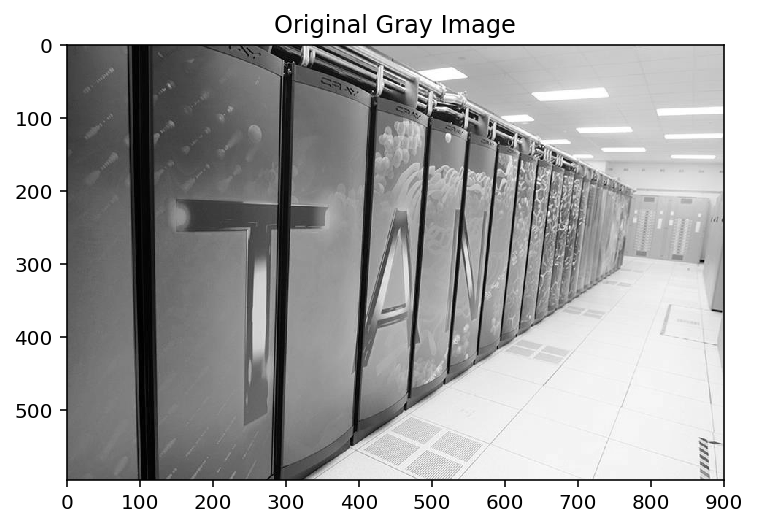

In [3]:
gray = np.loadtxt("titan_matrix.txt")
plt.title("Original Gray Image")
plt.imshow(gray,cmap = plt.get_cmap('gray'))
plt.show()

In [4]:
#an idea of what the data looks like
print(gray[:10,:10]) 

[[64.222 64.222 65.222 65.222 66.222 67.222 67.934 67.934 64.934 69.646]
 [64.222 65.222 65.222 66.222 67.222 68.222 67.934 68.934 67.934 70.646]
 [65.222 66.222 66.222 67.222 68.222 69.222 68.934 69.934 70.934 71.646]
 [66.222 66.222 67.222 68.222 69.222 69.222 69.934 69.934 71.934 71.646]
 [66.222 66.222 67.222 68.222 69.222 69.222 69.934 69.934 70.934 69.646]
 [65.222 66.222 66.222 67.222 68.222 69.222 68.934 69.934 67.934 68.646]
 [64.222 65.222 65.222 66.222 67.222 68.222 67.934 68.934 65.934 68.646]
 [64.222 64.222 65.222 65.222 66.222 67.222 67.934 67.934 64.934 69.646]
 [66.222 66.222 66.222 67.222 67.222 68.222 67.934 67.934 65.934 65.646]
 [66.222 66.222 66.222 67.222 67.222 68.222 67.934 67.934 67.934 67.646]]


# Correct SVD

In [5]:
%%time
u, s, vh = np.linalg.svd(gray,full_matrices=False)
newGray = (u*s)@vh

CPU times: user 739 ms, sys: 52.5 ms, total: 791 ms
Wall time: 483 ms


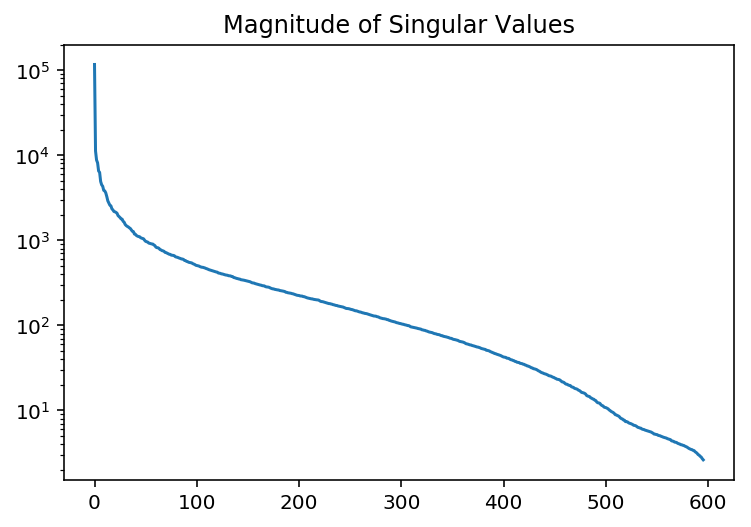

In [6]:
plt.plot(s)
plt.yscale('log')
plt.title("Magnitude of Singular Values")
plt.show()

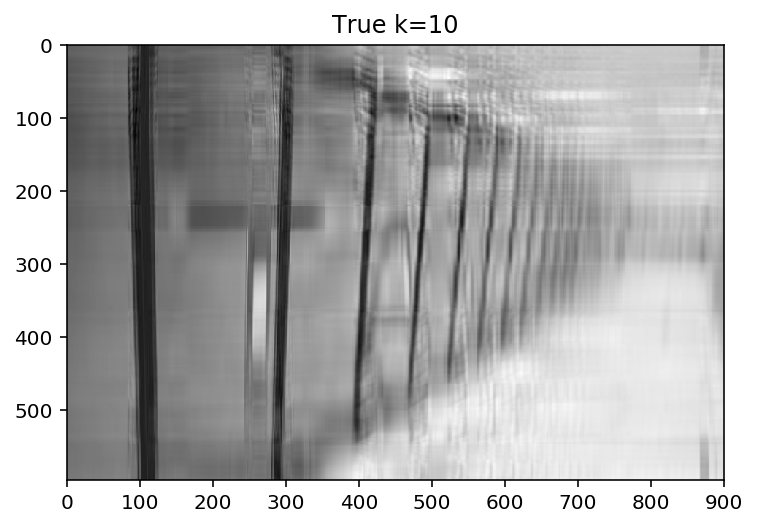

In [7]:
k=10
u, s, vh = np.linalg.svd(gray,full_matrices=False)
s[-(len(s)-k):]=0

newGray = (u*s)@vh
plt.imshow(newGray, cmap = plt.get_cmap('gray'))
plt.title("True k=%s"%(k))
plt.show()


# Random SVD implementations

In [8]:
#straight forward implementation

def easy_randomSVD(M,k):
    m,n = M.shape
    
    if m < n:
        M=M.T
    Ω   = np.random.normal(0,1,(M.shape[1],k))
    Q,R = np.linalg.qr(M @ Ω)
    B   = Q.T @ M
    u,S,Vt = np.linalg.svd(B,full_matrices=False)
    
    U = Q @ u
    if m<n:
        return Vt.T,S.T,U.T
    else:
        return U,S,Vt

# includes projection, but does it in a bad way
def full_unstable_randomSVD(M,k,q):
    m,n = M.shape
    
    if m < n:
        M=M.T
    Ω = np.random.normal(0,1,(M.shape[1],k))
    Y = M @ Ω
    MM = (M@M.T) #cache
    for j in range(q): 
        Y = MM @ Y
    Q,R = np.linalg.qr(Y)
    B   = Q.T @ M
    u,S,Vt = np.linalg.svd(B,full_matrices=False)
    
    U = Q @ u
    if m<n:
        return Vt.T,S.T,U.T
    else:
        return U,S,Vt   

#randomSVD with a more stable solution (but slow QR)
def full_randomSVD(M,k,q):
    m,n = M.shape
    
    if m < n:
        M=M.T
    Ω   = np.random.normal(0,1,(M.shape[1],k))
    Q,R = np.linalg.qr(M @ Ω)
    #Randomized Subspace Iteration
    for j in range(q):
        Q,R = np.linalg.qr(M.T @ Q )
        Q,R = np.linalg.qr(M @ Q  )
    B   = Q.T @ M
    u,S,Vt = np.linalg.svd(B,full_matrices=False)
    
    U = Q @ u
    if m<n:
        return Vt.T,S.T,U.T
    else:
        return U,S,Vt

In [9]:
%%time
k=10

U,S,Vt = easy_randomSVD(gray,k)
newGray = (U*S)@Vt


CPU times: user 13.7 ms, sys: 2.56 ms, total: 16.3 ms
Wall time: 9.92 ms


Approx error is: 19015.6076409738


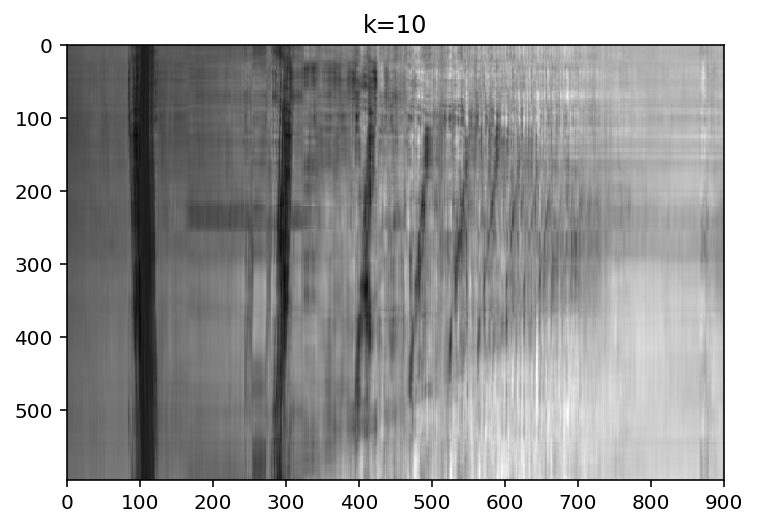

In [10]:
print("Approx error is:",np.linalg.norm(gray -newGray))
plt.imshow(newGray, cmap = plt.get_cmap('gray'))
plt.title("k=%s"%(k))
plt.show()

In [11]:
%%time
k=10
q=1

U,S,Vt = full_randomSVD(gray,k, q)
newGray = (U*S)@Vt


CPU times: user 22.1 ms, sys: 2.75 ms, total: 24.9 ms
Wall time: 15.5 ms


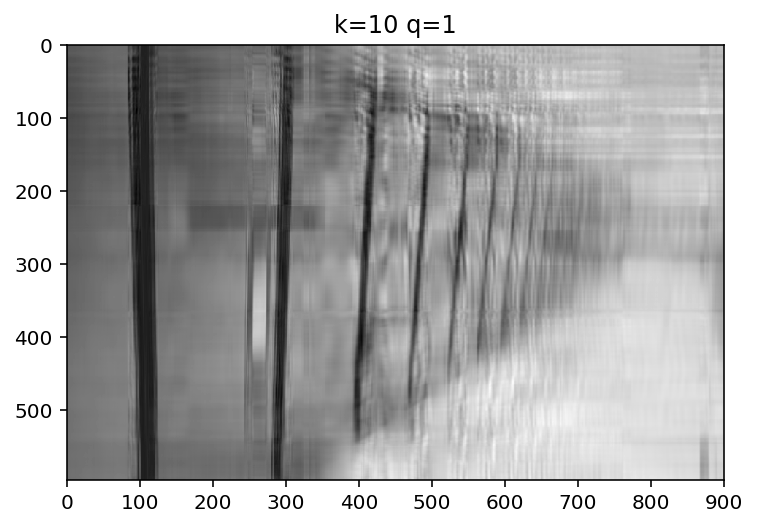

In [12]:
plt.imshow(newGray, cmap = plt.get_cmap('gray'))
plt.title("k=%s q=%s"%(k,q))
plt.show()

In [13]:
%%time
k=10
q=10

U,S,Vt = full_randomSVD(gray,k, q)
newGray = (U*S)@Vt


CPU times: user 107 ms, sys: 7.05 ms, total: 114 ms
Wall time: 65.4 ms


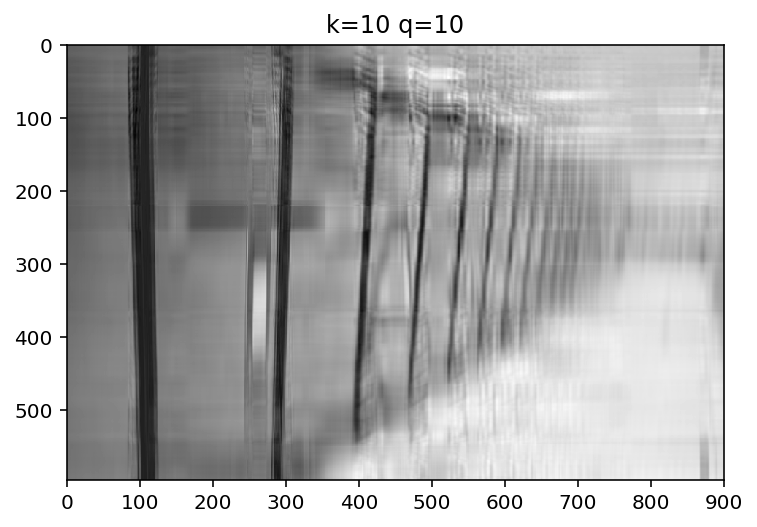

In [14]:
plt.imshow(newGray, cmap = plt.get_cmap('gray'))
plt.title("k=%s q=%s"%(k,q))
plt.show()

Now to see that the unstable version is in fact unstable

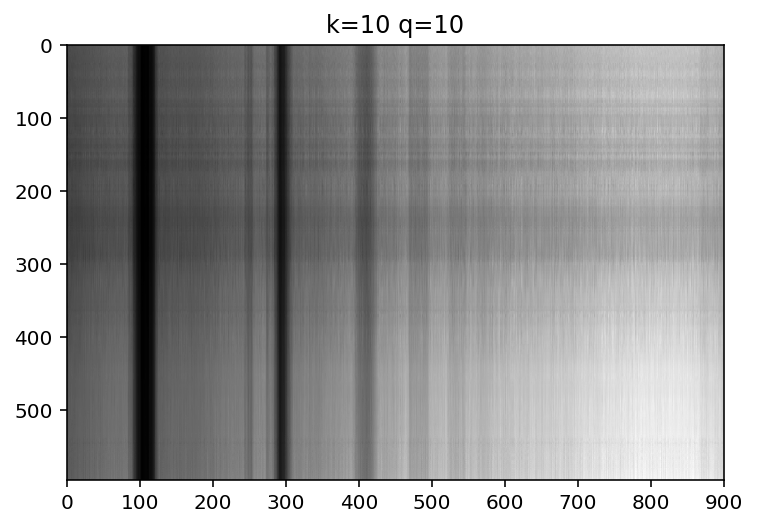

In [15]:
k=10
q=10

U,S,Vt = full_unstable_randomSVD(gray,k, q)
newGray = (U*S)@Vt
plt.imshow(newGray, cmap = plt.get_cmap('gray'))
plt.title("k=%s q=%s"%(k,q))
plt.show()

In [16]:
#===============================================
%load_ext watermark
%watermark

2019-02-01T06:19:32-06:00

CPython 3.7.0
IPython 6.4.0

compiler   : Clang 9.0.0 (clang-900.0.39.2)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
